In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras import utils
from tensorflow.keras import losses

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
def reshape_x(x):
    shape = x.shape
    # Just one color channel
    return x.reshape(*shape, 1)

def reshape_y(y):
    # The identity array is a square array with ones on the main diagonal
    return np.array(list(map(lambda x: np.identity(10)[x], y)))

train_x_r = reshape_x(train_x)
train_y_r = reshape_y(train_y)

test_x_r = reshape_x(test_x)
test_y_r = reshape_y(test_y)

input_shape = (*train_x.shape[-2:], 1)
print(input_shape)
# (28, 28, 1)

(28, 28, 1)


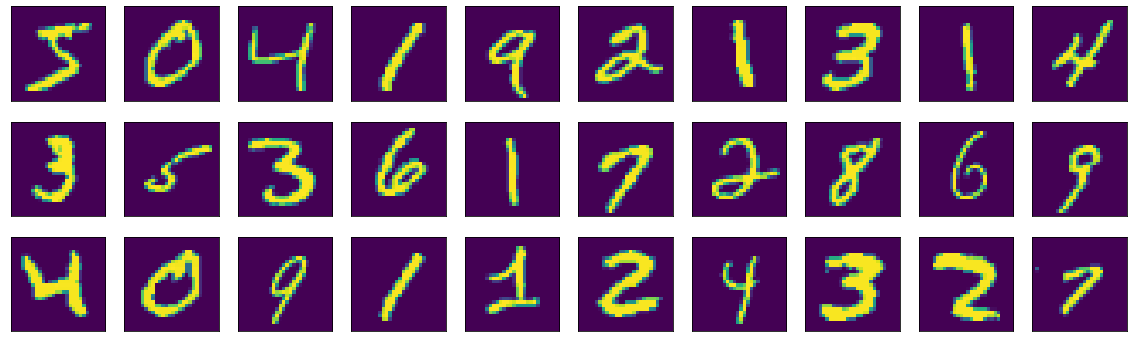

In [14]:
plt.figure(figsize=(20,6))
for i, img in enumerate(train_x):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i])
    if i == 29:
        break
plt.show()

In [6]:
BATCH = 32
EPOCHS = 12

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax') # fully-connected
])
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(train_x_r, train_y_r, batch_size=BATCH, epochs=EPOCHS)

Epoch 1/12
1875/1875 [==============================] - 56s 30ms/step - loss: 1.2905 - accuracy: 0.9101
Epoch 2/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0636 - accuracy: 0.9812
Epoch 3/12
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0405 - accuracy: 0.9879
Epoch 4/12
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 5/12
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 6/12
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0270 - accuracy: 0.9918
Epoch 7/12
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0230 - accuracy: 0.9934
Epoch 8/12
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0214 - accuracy: 0.9937
Epoch 9/12
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0235 - accuracy: 0.9938
Epoch 10/12
1875/1875 [==============================] - 50s 26m

In [7]:
model.save('mnist_model.h5')
model = models.load_model('mnist_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________


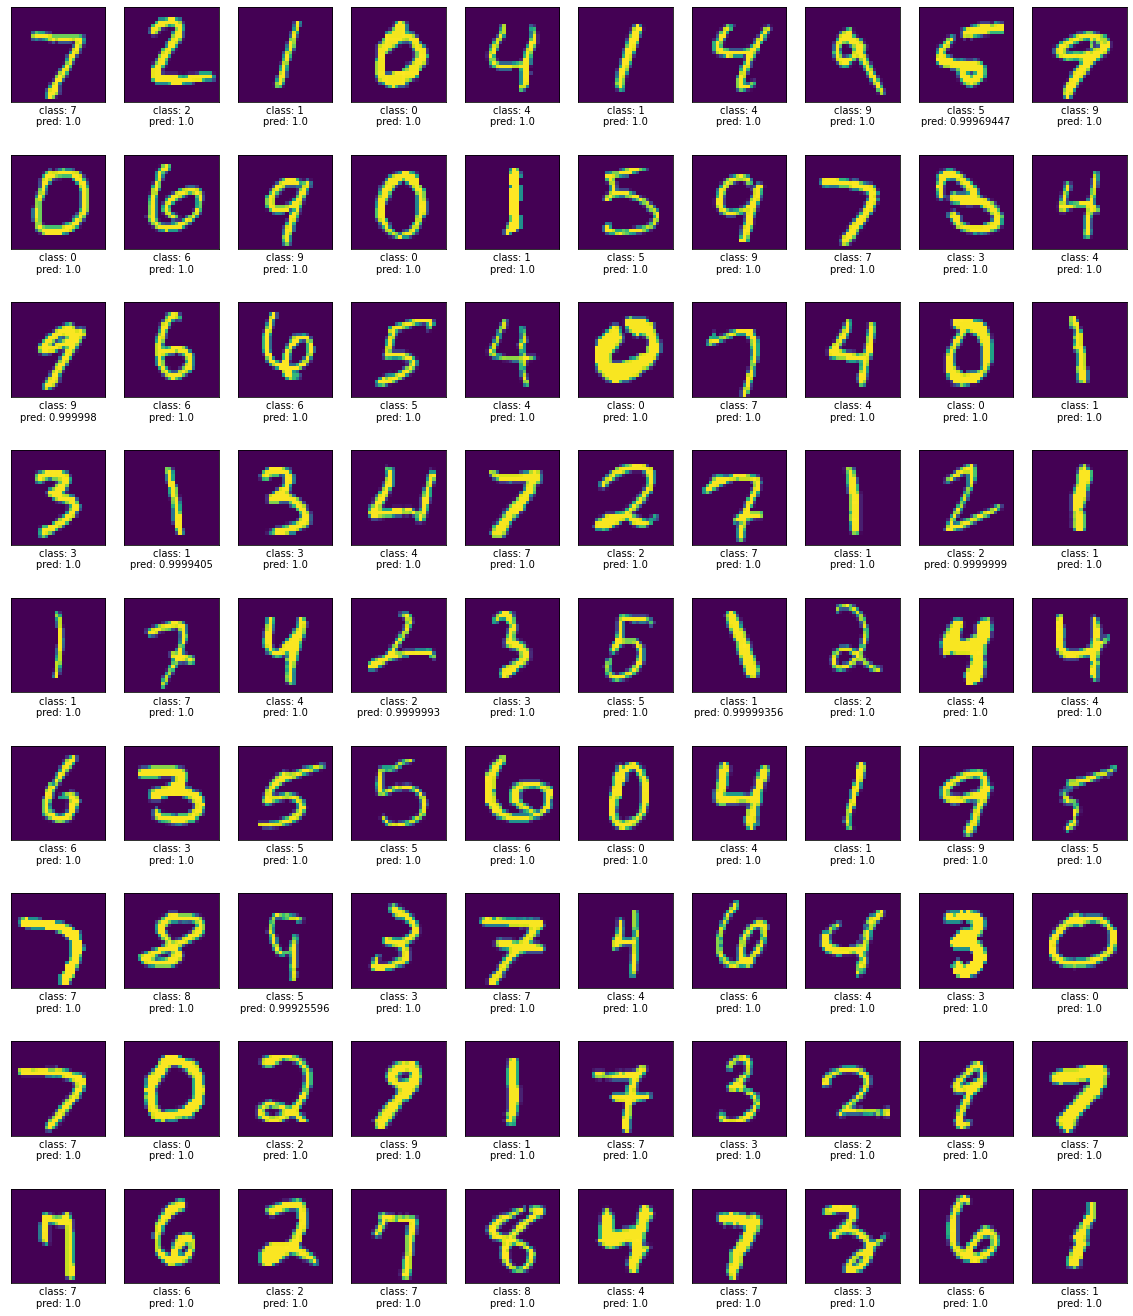

In [9]:
prediction = model.predict(test_x_r)

plt.figure(figsize=(20,24))
for i, img in enumerate(test_x):
    c = max(enumerate(prediction[i]), key=lambda x: x[1])
    
    plt.subplot(9,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_x[i])
    plt.xlabel("class: " + str(c[0]) + "\npred: " + str(c[1]))
    if i == 89:
        break
plt.show()